In [1]:
import numpy as np
from anilos import *
import matplotlib
import matplotlib.pyplot as plt
cmap = matplotlib.colormaps.get_cmap("jet")
import healpy as hp
from healpy.newvisufunc import projview

In [2]:
# Useful function for the examples
def alm_plot(y):
    #y : instance of anilos
    alms_list = []
    alms_list.append(y.almT_tensor)
    alms_list.append(y.almT_vector)

    alms_list.append(y.almE_tensor)
    alms_list.append(y.almE_vector)

    alms_list.append(y.almB_tensor)
    alms_list.append(y.almB_vector)
    
    return alms_list

list_label = ["T_tensor", "T_vector",
              "E_tensor", "E_vector",
              "B_tensor", "B_vector"
             ]

# Quickstart example

In [3]:
params = {} # Running Anilos with default values
x = Anilos(params) #intializing anilos

In [4]:
x.tensor_solver() # Compute the sources for tensor modes
x.vector_solver() # Compute the sources for vector modes
x.alm_tensor(1000) # Compute alms from l = 2 to l = 1000
x.alm_vector(1000) # Compute alms from l = 1 to l = 1000

In [5]:
# Store in an 1d array the alms
almT_tensor = x.almT_tensor
almE_tensor = x.almE_tensor
almB_tensor = x.almB_tensor

almT_vector = x.almT_vector
almE_vector = x.almE_vector
almB_vector = x.almB_vector

In [6]:
almT_tensor.shape

(999,)

In [7]:
almE_vector.shape

(1000,)

In [8]:
# If the user wants to create a map from the alms
x.alm_tensor(1000, healpy = True) 
x.alm_vector(1000, healpy = True)

In [9]:
alms_list = alm_plot(x)

In [10]:
# Create the maps
nside = 2 ** 7
maps_list = []
for i in range (6):
    map_from_alm = hp.sphtfunc.alm2map(alms_list[i], nside)
    maps_list.append(map_from_alm)

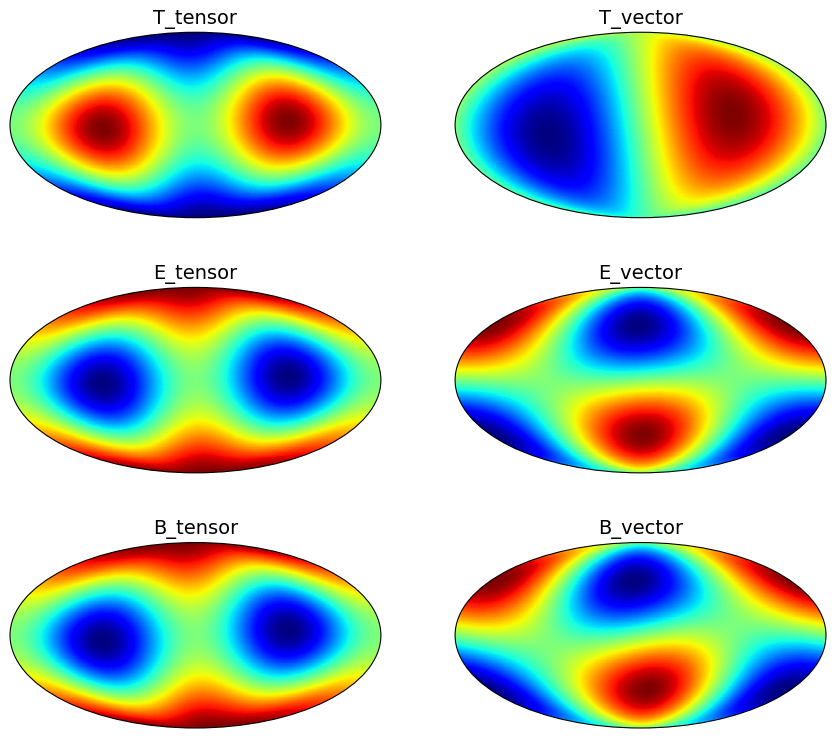

In [11]:
j = 0
for _ in range (3):
    for _ in range (2):
        projview(
                maps_list[j],
                projection_type="mollweide",
                cmap = cmap,
                rot = (0, 90, 0),
                sub = (3,2, j+1),
                cbar = False,
                title = list_label[j]
                )
        j+=1

# Changing parameters 

In [12]:
params = {'h_hubble' : 0.72, # Dimensionless Hubble constant
          # 'Omega_K' : 0.01, # Curvature density today
          # 'Omega_b' : 0.04, # Baryon density parameter today
          # 'Omega_cdm' : 0.2, # CDM density parameter today
          'Omega_m' : 0.24, # Matter density parameter today
          'Omega_Lambda' : 0.76, # Dark energy density parameter today
          'z_reio' : 10, # Reionization redshift
          'cutoff_multipole' : 32, # Cutoff multipole for Boltzmann hierarchy
          'sqrth' : 0.0002, #  Spiraling length over curvature radius
          # 'epsilon_TC' : 0.03 # Condition to define the tight coupling regime
          'IC' : 'isocurvature', # Initial conditions for vector modes
                                 # 'isocurvature' or 'octupole',
          'gauge' : 'synchronous', # Defines the gauge of the variables for vector modes
                                   # 'synchronous' or 'newtonian'
          'verbose' : 'True' # Whether the user wants a more detailed output.
         }
x = Anilos(params)

parameters are:
h = 0.72
Omega_b = 0.04867734979810887
Omega_cdm = 0.19132265020189113
Omega_photons = 4.7704075633899625e-05
Omega_nu = 3.2978527541010064e-05
curvature radius = 4163784.138888889 Mpc
spiraling_length = 832.7568277777779 Mpc


In [13]:
x.tensor_solver()
x.vector_solver()
x.alm_tensor(1000, healpy = True)
x.alm_vector(1000, healpy = True)

generalized fourier mode for tensor modes is (0.0024016614854266943+2.4016614854266946e-07j)
TC conditions on k and H are at eta =  233.46635327670168  and  158.8484023808435
generalized fourier mode for vector modes is (0.0012008307427133472+2.4016614854266946e-07j)
TC conditions on k and H are at eta =  253.4582593717931  and  158.8484023808435
generalized fourier mode for tensor modes is (0.0024016614854266943+2.4016614854266946e-07j)
TC conditions on k and H are at eta =  233.46635327670168  and  158.8484023808435
generalized fourier mode for vector modes is (0.0012008307427133472+2.4016614854266946e-07j)
TC conditions on k and H are at eta =  253.4582593717931  and  158.8484023808435


In [14]:
alms_list = alm_plot(x)

In [15]:
# Create the maps
nside = 2 ** 7
maps_list = []
for i in range (6):
    map_from_alm = hp.sphtfunc.alm2map(alms_list[i], nside)
    maps_list.append(map_from_alm)

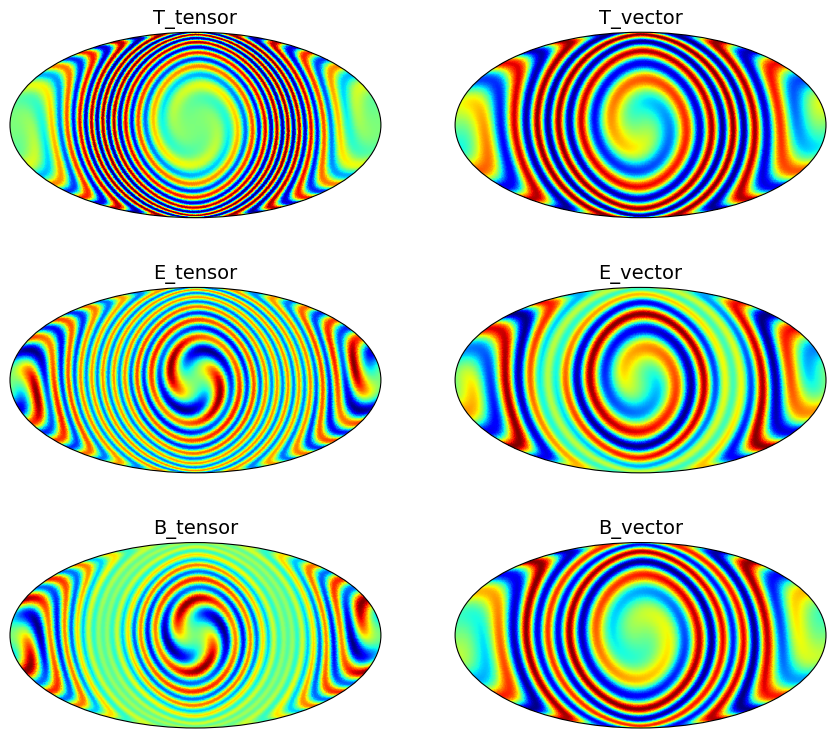

In [16]:
j = 0
for _ in range (3):
    for _ in range (2):
        projview(
                maps_list[j],
                projection_type="mollweide",
                cmap = cmap,
                rot = (0, 90, 0),
                sub = (3,2, j+1),
                cbar = False,
                title = list_label[j]
                )
        j+=1

# Choosing a Bianchi Model

Maps for each Bianchi model with isotropic limit can be computed setting combinations of $\sqrt{h}$ and $\Omega_K$ (or values of the density parameters).

Bianchi VII$_0$ : finite $\sqrt{h}$ and $\Omega_K = 10^{-6}$ (or combinations of $\Omega_m$ and $\Omega_\Lambda$ such that $\Omega_K$ is small);

Bianchi VII$_h$ : finite $\sqrt{h}$ and positive $\Omega_K$;

Bianchi V : large $\sqrt{h}$, around $10^4$ or above, and positive $\Omega_K$;

Bianchi IX : Negative $\Omega_K$.

## Bianchi VII$_0$

In [17]:
params = {'Omega_m' : 0.24,
          'Omega_Lambda' : 0.76,
          'sqrth' : 0.0002,
          'IC' : 'octupole'
         }
x = Anilos(params)

In [18]:
x.tensor_solver()
x.vector_solver()
x.alm_tensor(1000, healpy = True)
x.alm_vector(1000, healpy = True)

In [19]:
alms_list = alm_plot(x)

In [20]:
# Create the maps
nside = 2 ** 7
maps_list = []
for i in range (6):
    map_from_alm = hp.sphtfunc.alm2map(alms_list[i], nside)
    maps_list.append(map_from_alm)

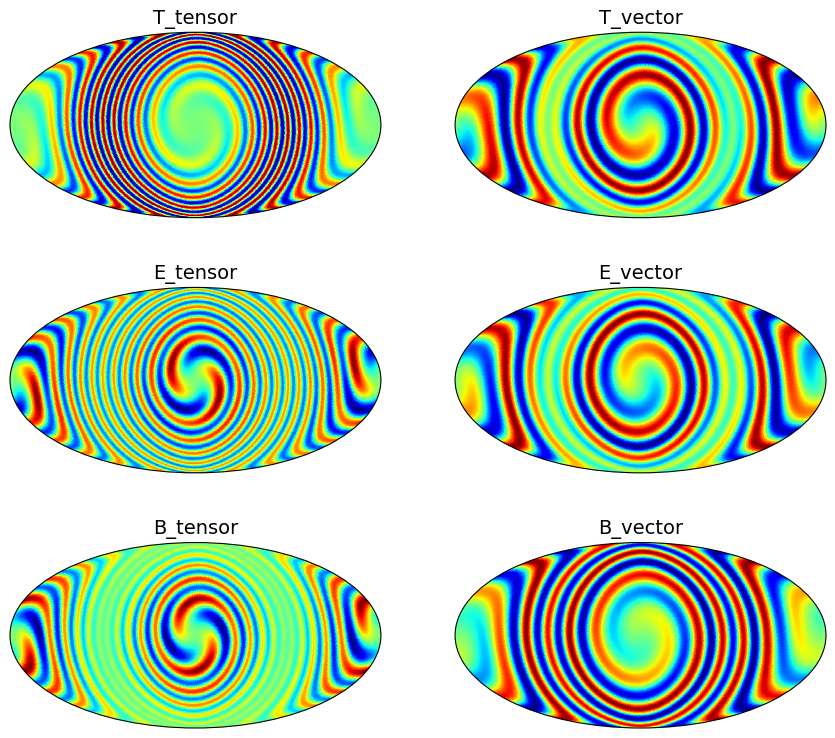

In [21]:
j = 0
for _ in range (3):
    for _ in range (2):
        projview(
                maps_list[j],
                projection_type="mollweide",
                cmap = cmap,
                rot = (0, 90, 0),
                sub = (3,2, j+1),
                cbar = False,
                title = list_label[j]
                )
        j+=1

## Bianchi VII$_h$

In [22]:
params = {'Omega_K' : 0.01,
          'sqrth' : 0.02,
          'gauge' : 'newtonian'
         }
x = Anilos(params)

In [23]:
x.tensor_solver()
x.vector_solver()
x.alm_tensor(1000, healpy = True)
x.alm_vector(1000, healpy = True)

In [24]:
alms_list = alm_plot(x)

In [25]:
# Create the maps
nside = 2 ** 7
maps_list = []
for i in range (6):
    map_from_alm = hp.sphtfunc.alm2map(alms_list[i], nside)
    maps_list.append(map_from_alm)

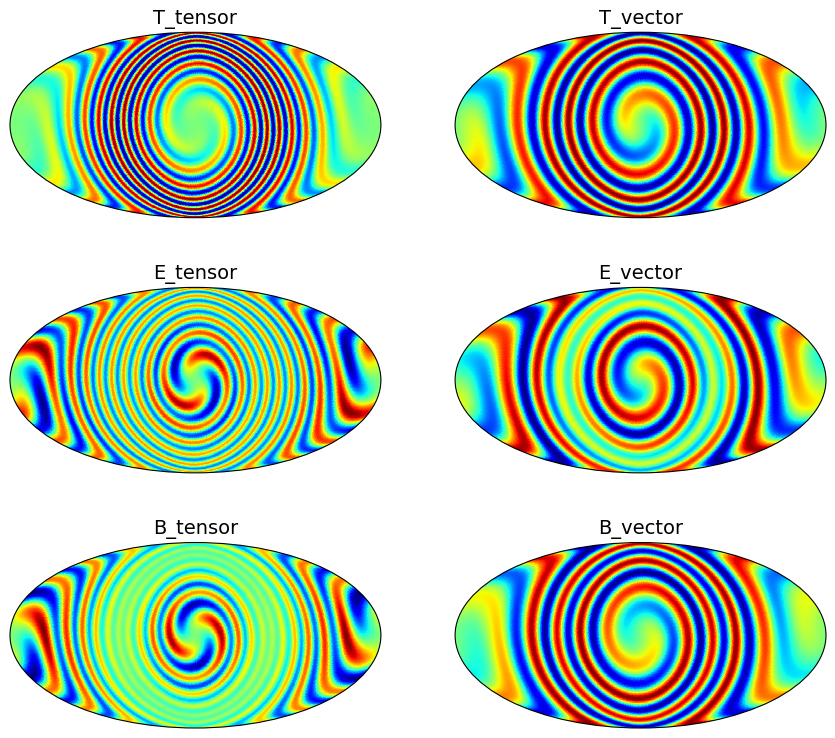

In [26]:
j = 0
for _ in range (3):
    for _ in range (2):
        projview(
                maps_list[j],
                projection_type="mollweide",
                cmap = cmap,
                rot = (0, 90, 0),
                sub = (3,2, j+1),
                cbar = False,
                title = list_label[j]
                )
        j+=1

## Bianchi V

In [27]:
params = {'Omega_K' : 0.01,
          'sqrth' : 1e4
         }
x = Anilos(params)

In [28]:
x.tensor_solver()
x.vector_solver()
x.alm_tensor(1000, healpy = True)
x.alm_vector(1000, healpy = True)

In [29]:
alms_list = alm_plot(x)

In [30]:
# Create the maps
nside = 2 ** 7
maps_list = []
for i in range (6):
    map_from_alm = hp.sphtfunc.alm2map(alms_list[i], nside)
    maps_list.append(map_from_alm)

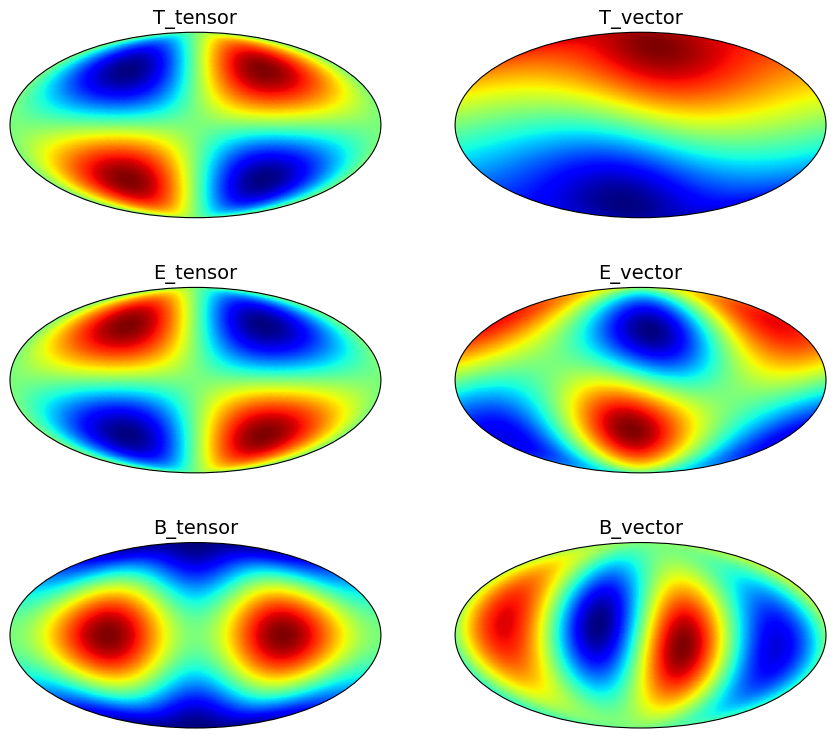

In [31]:
j = 0
for _ in range (3):
    for _ in range (2):
        projview(
                maps_list[j],
                projection_type="mollweide",
                cmap = cmap,
                rot = (0, 90, 0),
                sub = (3,2, j+1),
                cbar = False,
                title = list_label[j]
                )
        j+=1

## Bianchi IX

Bianchi IX is an special case where only the quadrupole of the tensor mode is non-zero

In [32]:
params = {'Omega_K' : -0.01}
x = Anilos(params)

In [33]:
x.tensor_solver()
x.alm_tensor(1000, healpy = True)

/home/joao/anaconda3/lib/python3.9/site-packages/anilos/anilos.py:441: UserWarning: ell_max must be 2 in Bianchi IX. Changing the value.
  warnings.warn("ell_max must be 2 in Bianchi IX. Changing the value.")
/home/joao/anaconda3/lib/python3.9/site-packages/anilos/anilos.py:575: UserWarning: There are no non zero multipoles                               higher than the quadrupole in Bianchi IX
  warnings.warn("There are no non zero multipoles \


In [34]:
alms_list = []
alms_list.append(x.almT_tensor)
alms_list.append(x.almE_tensor)
alms_list.append(x.almB_tensor)

In [35]:
# Create the maps
nside = 2 ** 7
maps_list = []
for i in range (3):
    map_from_alm = hp.sphtfunc.alm2map(alms_list[i], nside)
    maps_list.append(map_from_alm)

In [36]:
list_label = ["T", "E", "B"]

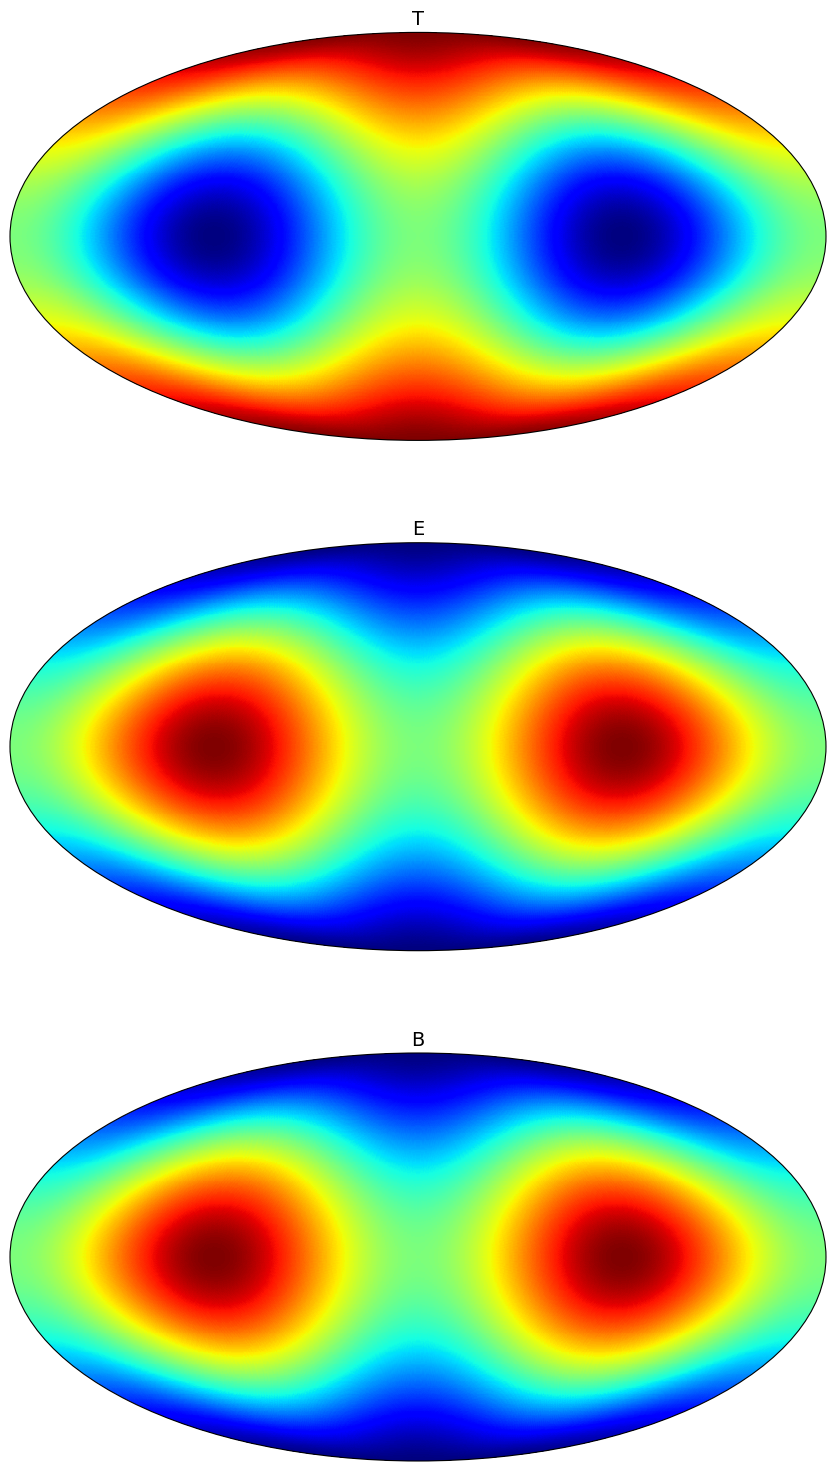

In [37]:
j = 0
for _ in range (3):
    projview(
            maps_list[j],
            projection_type="mollweide",
            cmap = cmap,
            rot = (0, 90, 0),
            sub = (3,1, j+1),
            cbar = False,
            title = list_label[j]
            )
    j+=1

# Other functionalities

Since Anilos computes the hierarchy up to the cutoff multipole, the photon temperature and polarization perturbations, the neutrino temperature perturbations, the shear (for tensor modes), and the vector metric perturbation are avaiable as functions of time. See the docstring of tensor_solver and vector_solver.

In [38]:
params = {'Omega_K' : 0.01,
          'sqrth' : 0.02,
          'gauge' : 'synchronous'
         }
x = Anilos(params)

In [39]:
x.tensor_solver()
x.vector_solver()

In [40]:
shear_btc_tensor = x.tensor_tc[1] # Shear during tight-coupling
shear_atc_tensor = x.nteb_tensor[1] # Shear after tight-coupling

shear_btc_vector = x.vector_tc[1] # Shear during tight-coupling
shear_atc_vector = x.nteb_vector[1] # Shear after tight-coupling
a = x.atable # scale factor
# z = x.ztable
# eta = x.etatable
index_end_tightc = x.index_end_tightc # index where tc ends

Text(0.5, 1.0, 'Imag')

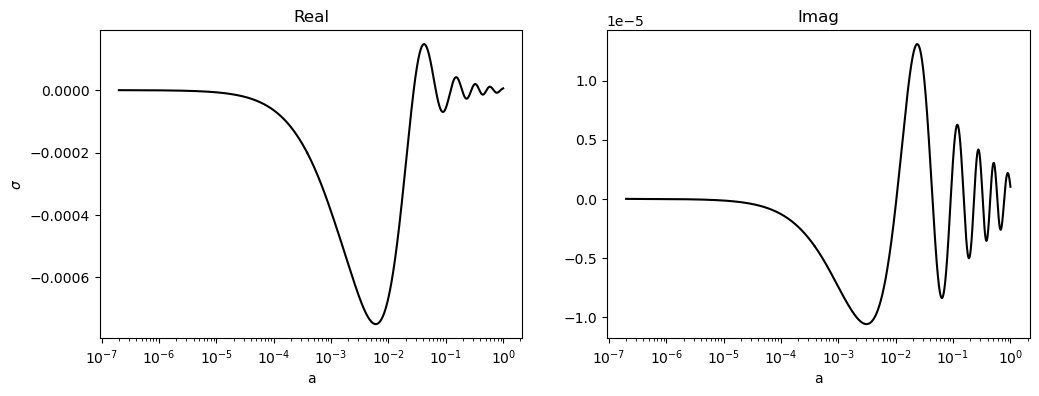

In [41]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ax[0].plot(a[0:x.index_end_tightc], np.real(shear_btc_tensor), color = 'black')
ax[0].plot(a[x.index_end_tightc:], np.real(shear_atc_tensor), color = 'black')
ax[0].set_xscale('log')
ax[0].set_xlabel('a')
ax[0].set_ylabel(r'$\sigma$')
ax[0].set_title('Real')
ax[1].plot(a[0:x.index_end_tightc], np.imag(shear_btc_tensor), color = 'black')
ax[1].plot(a[x.index_end_tightc:], np.imag(shear_atc_tensor), color = 'black')
ax[1].set_xlabel('a')
ax[1].set_xscale('log')
ax[1].set_title('Imag')

Text(0.5, 1.0, 'Imag')

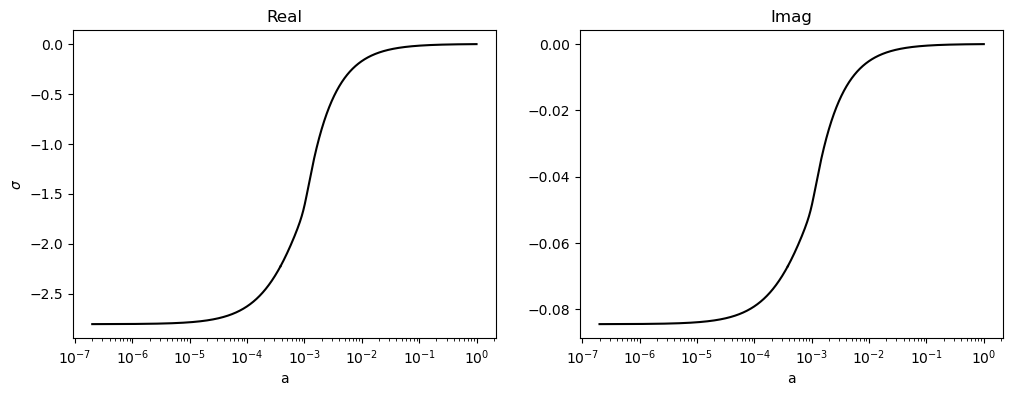

In [42]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ax[0].plot(a[0:x.index_end_tightc], np.real(shear_btc_vector), color = 'black')
ax[0].plot(a[x.index_end_tightc:], np.real(shear_atc_vector), color = 'black')
ax[0].set_xscale('log')
ax[0].set_xlabel('a')
ax[0].set_ylabel(r'$\sigma$')
ax[0].set_title('Real')
ax[1].plot(a[0:x.index_end_tightc], np.imag(shear_btc_vector), color = 'black')
ax[1].plot(a[x.index_end_tightc:], np.imag(shear_atc_vector), color = 'black')
ax[1].set_xlabel('a')
ax[1].set_xscale('log')
ax[1].set_title('Imag')